In [1]:
import astropy.units as u
import numpy as np
import warnings 
import sys 
warnings.filterwarnings('ignore')
sys.path.append('./../')

from tools_contsub_main import *
from tools_contsub_misc import *
from tools_contsub_units import *
from tools_contsub_plots import *
from tools_contsub_anchoring import * 
from tools_contsub_smoothregrid import * 
from tools_contsub_postprocess import * 

In [2]:
galaxy = 'ngc6744'
galaxy_muse = galaxy
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/%s/' %galaxy
rootdir_bp = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/' 

narrowband_filter = 'f657n'
instrument_f555w  = 'uvis'
instrument_f65Xn = 'uvis'
instrument_f814w = 'uvis'

# Load files
hdu_hst_f555w   = get_hdu(rootdir, 'hst/%s*_%s_*f555w*.fits' %(galaxy, instrument_f555w))
hdu_hst_f65Xn   = get_hdu(rootdir, 'hst/%s*_%s_*%s*.fits' %(galaxy, instrument_f65Xn, narrowband_filter))
hdu_hst_f814w   = get_hdu(rootdir, 'hst/%s*_%s_*f814w*.fits' %(galaxy, instrument_f814w))

# Get filter curve info
bp = get_bandpassinfo(rootdir_bp)

# Cosmic ray thresholds
cr_threshold = 0.25
cr_dilation_iterations = 1

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc6744/hst/ngc6744_uvis_f555w_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc6744/hst/ngc6744_uvis_f657n_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc6744/hst/ngc6744_uvis_f814w_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F550M.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F555W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F658N.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F814W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS1.F555W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS1.F657N.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS1.F658N.

[Info] Outputing to the following: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc6744/hst_contsub/
[INFO] Remove NaN values around edge of image...
[INFO] Reprojecting the input image to match the template WCS...
[INFO] Performing image reprojection...
[INFO] Image reprojection complete.
[INFO] Scaling the output data to conserve flux with factor 1.00
[INFO] Flux scaling complete.
[INFO] Reprojection process completed.
[INFO] Reprojecting the input image to match the template WCS...
[INFO] Performing image reprojection...
[INFO] Image reprojection complete.
[INFO] Scaling the output data to conserve flux with factor 1.00
[INFO] Flux scaling complete.
[INFO] Reprojection process completed.
[INFO] Remove NaN values around edge of image...
[INFO] Pixel scale: 0.04 arcsec arcsec
[INFO] Initial Resolution: 0.07 arcsec arcsec
[INFO] Desired Resolution: 0.21 arcsec arcsec
[INFO] Convolution kernel: 0.20 arcsec arcsec
[INFO] Performing image convolution...
[INFO] Image convo

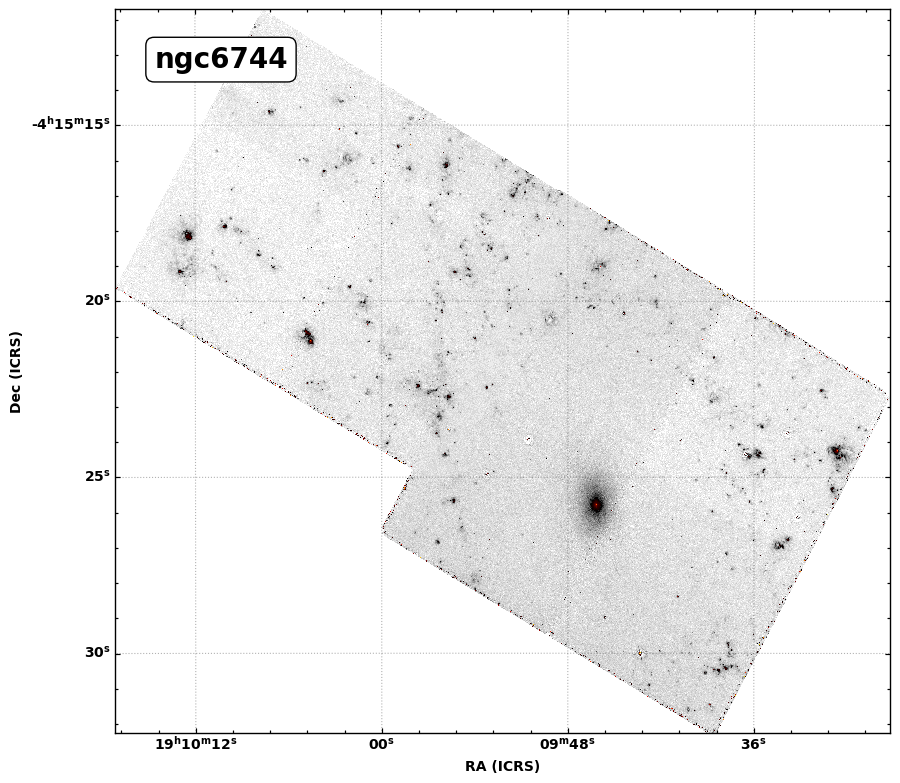

In [3]:
# Make paths
make_paths(rootdir)

# Crop maps 
hdu_hst_f555w = get_nanzeros(hdu_hst_f555w)
hdu_hst_f65Xn = get_nanzeros(hdu_hst_f65Xn)
hdu_hst_f814w = get_nanzeros(hdu_hst_f814w)
hdu_hst_f65Xn = remove_nan_padding(hdu_hst_f65Xn)
hdu_hst_f555w = get_regrid(hdu_hst_f555w, hdu_hst_f65Xn)
hdu_hst_f814w = get_regrid(hdu_hst_f814w, hdu_hst_f65Xn)
hdu_hst_f555w, hdu_hst_f65Xn, hdu_hst_f814w = get_covmask(hdu_hst_f555w, hdu_hst_f65Xn, hdu_hst_f814w)

# Convert units 
hdu_hst_f555w = get_electrons_2_ergcm2sA(hdu_hst_f555w)
hdu_hst_f65Xn = get_electrons_2_ergcm2sA(hdu_hst_f65Xn)
hdu_hst_f814w = get_electrons_2_ergcm2sA(hdu_hst_f814w)

# Continuum subtract       
hdu_hst_halpha, hdu_hst_cont = get_contsub(hdu_hst_f65Xn.copy(), 
                                hdu_hst_f555w.copy(), 
                                hdu_hst_f814w.copy(), 
                                bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'], 
                                bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'], 
                                bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])

# Convert units
photbw = bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['rectwidth']
hdu_hst_halpha = get_ergcm2sA_2_ergcm2s(hdu_hst_halpha, photbw)
hdu_hst_cont = get_ergcm2sA_2_ergcm2s(hdu_hst_cont, photbw)

# Make maps plots
make_plots_map(hdu_hst_halpha, galaxy, 'hst_%s_contsub' %narrowband_filter, rootdir)

# Save files
write_hdu(hdu_hst_halpha, rootdir, '%s_hst_%s_contsub.fits' %(galaxy, narrowband_filter))
write_hdu(hdu_hst_cont, rootdir, '%s_hst_%s_cont.fits' %(galaxy, narrowband_filter))

In [4]:
# # Coverage mask
# hdu_mask = get_mask(hdu_hst_halpha)

# # Interpolate negatives
# hdu_hst_halpha_i = get_interp_negs(hdu_hst_halpha, hdu_mask)

# # Remove cosmic rays
# hdu_hst_halpha_ic = get_cosmicrays(hdu_hst_halpha_i, hdu_mask, threshold=cr_threshold, dilation_iterations=cr_dilation_iterations)

# # Save files
# write_hdu(hdu_hst_halpha_i, rootdir, '%s_hst_%s_contsub_i.fits' %(galaxy, narrowband_filter))
# write_hdu(hdu_hst_halpha_ic, rootdir, '%s_hst_%s_contsub_ic.fits' %(galaxy, narrowband_filter))